# Proposition 3.4

### QFT matrices (of the same size) are connected via a simple rotation (=quaternion conjugation, qpq^{-1})

In [1]:
import numpy as np 
np.set_printoptions(precision=2, suppress=True)  # for compact output
from circulant import circulant_filter
from quaternion_matrix import quatlength
from quaternion_circulant_matrix import create_qft_matrix
from quaternion_symplectic import qfft, iqfft, load_image, get_modulus_phase_axis, vis
np.set_printoptions(precision=2, suppress=True)  # for compact output
from matplotlib import pyplot as plt 

def expq(mu, theta):
    res = np.cos(theta) + mu * np.sin(theta)
    #return(res.normalized()) # it should be normalized from the get-go, done for numerical reasons
    return(res)

def innerprod(a, b):
    return(a.x*b.x + a.y*b.y + a.z*b.z)

def crossprod(a, b):
    res = a*b + innerprod(a,b)
    return(res)

def matrix_conjugation(A, q):
    '''
    Compute qAq^{-1}
    '''
    M, N = A.shape
    res = np.zeros_like(A, dtype=np.quaternion)
    for i in range(M):
        for j in range(N):
            res[i, j] = q * A[i,j] * q.conj()
    return(res)
    

quaternion(0, -0.440201656371369, 0.489230279666875, -0.752911837591211) quaternion(0, 0.0874875747494677, 0.613637101725071, -0.784726341886718)
31.512360226511653 degrees
quaternion(2.77555756156289e-17, -0.440201656371369, 0.489230279666875, -0.752911837591211)
Should be zero: 1.334513280131988e-11


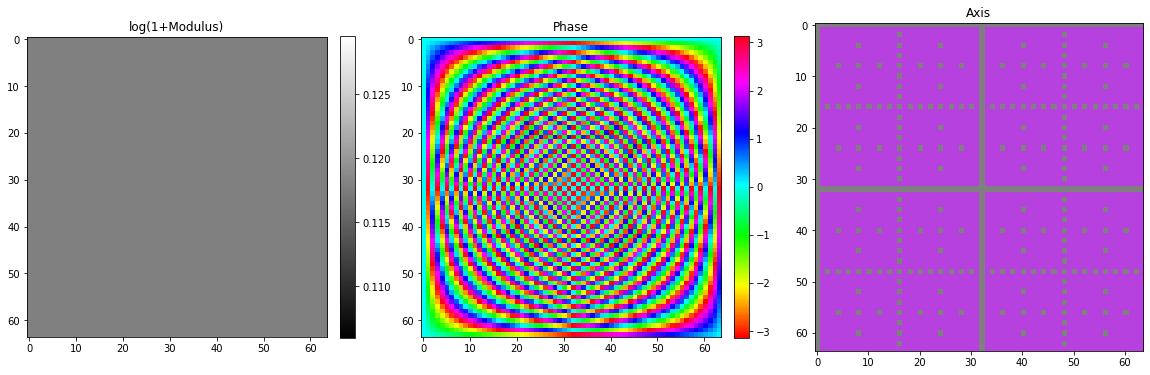

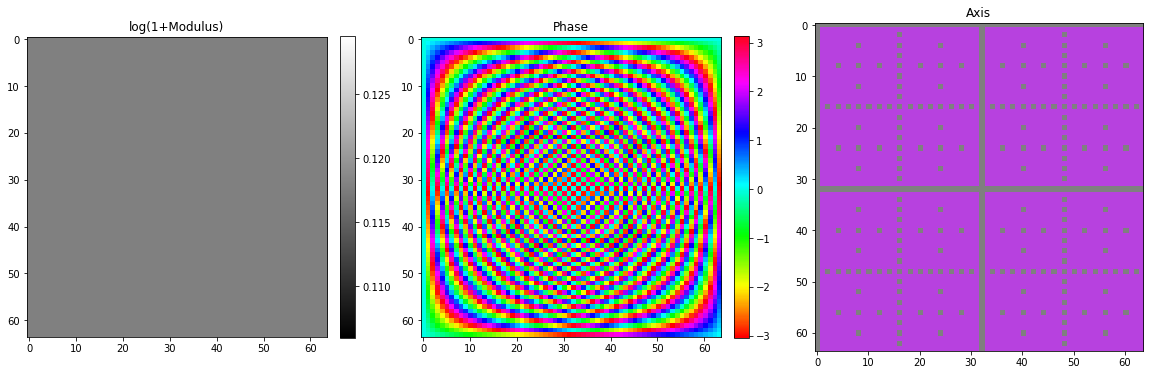

In [3]:
N = 64
mu = np.quaternion(0, np.random.randn(), np.random.randn(), np.random.randn()).normalized()
nu = np.quaternion(0, np.random.randn(), np.random.randn(), np.random.randn()).normalized()
print(mu, nu)
Emu = create_qft_matrix(N, mu)
Enu = create_qft_matrix(N, nu)
xi = crossprod(nu,mu).normalized()
#xi = nu*mu
theta = np.arccos(innerprod(mu, nu))
print('{} degrees'.format(theta * 180 / np.pi))
p = expq(xi, theta / 2)
newaxis = p * nu * p.conj()
estimate = p * Enu * p.conj()
print(newaxis)
print('Should be zero: {}'.format(np.sum(np.abs(estimate - Emu))))
_ = vis(Emu)
_ = vis(p * Enu * p.conj())